# Tokyo Airbnb Price Prediction & Listing Recommendation
by GIOVALDI RAMADHAN

referensi bacaan
- https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

# Business Understanding

## Problem Statement
In recent years, the popularity of Airbnb accommodations has grown rapidly, and Tokyo, being one of the most vibrant and culturally rich cities in the world, attracts millions of tourists annually. However, for travelers and property owners alike, accurately predicting the price of an Airbnb listing and recommending suitable spaces for guests can be challenging due to various factors that influence pricing and user preferences.

The objective of this Data Science project titled "Tokyo Airbnb Price Prediction & Listing Recommendation" is to develop a comprehensive model that can predict the price of Airbnb listings in Tokyo accurately. Additionally, the project aims to provide personalized recommendations for spaces that align with guests' preferences and requirements.

## Goals

- Accurate Price Prediction: Develop a reliable Tokyo Airbnb price prediction model to aid hosts in setting optimal listing prices and maximizing revenue.

- Enhanced User Experience: Build a personalized recommendation system that suggests suitable Airbnb spaces to travelers based on their preferences, improving user satisfaction.

- Market Insights: Gain valuable insights into key factors influencing Airbnb prices in Tokyo to inform property management and investment decisions.

# Data Understanding

Gather data from various sources, including Airbnb listings, geospatial datasets, user reviews, and property amenities information.
Explore the data to gain insights into its structure, quality, and potential issues that need to be addressed during data cleaning and preprocessing.

## Import Libraries

In [50]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [2]:
print('pandas version:', pd.__version__,'per Agustus 2020')
print('matplotlib version:', matplotlib.__version__,'per Agustus 2020')
print('seaborn version:', sns.__version__,'per Agustus 2020')
print('numpy version:', np.__version__,'per Agustus 2020')
print('folium version:', folium.__version__,'per Agustus 2020')

pandas version: 1.5.3 per Agustus 2020
matplotlib version: 3.7.1 per Agustus 2020
seaborn version: 0.12.2 per Agustus 2020
numpy version: 1.22.4 per Agustus 2020
folium version: 0.14.0 per Agustus 2020


## Load Data


Airbnb provides three datasets: listing, calendar, and review.

The listing dataset contains information related to Airbnb properties available for rent in Tokyo, including price, city, room type, property type, number of bedrooms, and more.

The calendar dataset contains information about the availability dates and prices for each date of the listed Airbnb properties.

Lastly, the review dataset contains summaries of reviews or user satisfaction ratings regarding the Airbnb properties they have previously rented.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
calendar = pd.read_csv('/content/drive/MyDrive/Portofolio 2023/Machine Learning Project - Tokyo Airbnb Price Prediction/dataset/calendar.csv')
listing = pd.read_csv('/content/drive/MyDrive/Portofolio 2023/Machine Learning Project - Tokyo Airbnb Price Prediction/dataset/listings.csv')
review = pd.read_csv('/content/drive/MyDrive/Portofolio 2023/Machine Learning Project - Tokyo Airbnb Price Prediction/dataset/reviews.csv')

In [100]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10414 non-null  int64  
 1   listing_url                                   10414 non-null  object 
 2   scrape_id                                     10414 non-null  int64  
 3   last_scraped                                  10414 non-null  object 
 4   name                                          10414 non-null  object 
 5   description                                   10388 non-null  object 
 6   neighborhood_overview                         7756 non-null   object 
 7   picture_url                                   10414 non-null  object 
 8   host_id                                       10414 non-null  int64  
 9   host_url                                      10414 non-null 

In [101]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791958 entries, 0 to 3791957
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 202.5+ MB


In [102]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274946 entries, 0 to 274945
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     274946 non-null  int64 
 1   id             274946 non-null  int64 
 2   date           274946 non-null  object
 3   reviewer_id    274946 non-null  int64 
 4   reviewer_name  274945 non-null  object
 5   comments       274735 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.6+ MB


In [5]:
calendar.head(1)

listing_id        date available       price adjusted_price  \
0     4606903  2021-10-29         f  $20,000.00     $20,000.00   

   minimum_nights  maximum_nights  
0             3.0            30.0

In [6]:
print("Jumlah kolom :", calendar.shape[1]) # indexing 1
print("Jumlah baris :", calendar.shape[0]) # indexing 0

Jumlah kolom : 7
Jumlah baris : 3791958


In [7]:
listing.head(1)

id                          listing_url       scrape_id last_scraped  \
0  197677  https://www.airbnb.com/rooms/197677  20211028222535   2021-10-29   

                        name  \
0  Oshiage Holiday Apartment   

                                         description neighborhood_overview  \
0  <b>The space</b><br />We are happy to welcome ...                   NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/38437056/d27f...   964081   

                                   host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/964081  Yoshimi & Marek  2011-08-13   

  host_location                                         host_about  \
0         Tokyo  Would love to travel all over the world and me...   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/964081/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/964081/profil...    Sumida District   

   host_listings_count  host_total_listings_count  \
0                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      f           NaN              Sumida Ku   

   neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                           NaN  35.71707  139.82608  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             4        NaN         1 bath       1.0   2.0   

                                           amenities       price  \
0  ["Shampoo", "Kitchen", "Essentials", "Microwav...  $11,000.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               3             365                     3.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     3.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
0                     3.0                   365.0               NaN   

  has_availability  availability_30  availability_60  availability_90  \
0                t               28               58               88   

   availability_365 calendar_last_scraped  number_of_reviews  \
0               363            2021-10-29                165   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0                      0                       0   2012-09-25  2019-11-14   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.76                    4.73                       4.91   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.83                         4.82                    4.51   

   review_scores_value     license instant_bookable  \
0                 4.78  M130003350                f   

   calculated_host_listings_count  \
0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               1.49

In [8]:
print("Jumlah kolom :", listing.shape[1]) # indexing 1
print("Jumlah baris :", listing.shape[0]) # indexing 0

Jumlah kolom : 74
Jumlah baris : 10414


In [9]:
review.head(1)

listing_id      id        date  reviewer_id reviewer_name  \
0      197677  554285  2011-09-21      1002142         Pablo   

                                            comments  
0  Couldn’t get any better!\r<br/>\r<br/>The apar...

In [10]:
print("Jumlah kolom :", review.shape[1]) # indexing 1
print("Jumlah baris :", review.shape[0]) # indexing 0

Jumlah kolom : 6
Jumlah baris : 274946


## Describe Data

In [11]:
listing.head(1)

id                          listing_url       scrape_id last_scraped  \
0  197677  https://www.airbnb.com/rooms/197677  20211028222535   2021-10-29   

                        name  \
0  Oshiage Holiday Apartment   

                                         description neighborhood_overview  \
0  <b>The space</b><br />We are happy to welcome ...                   NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/38437056/d27f...   964081   

                                   host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/964081  Yoshimi & Marek  2011-08-13   

  host_location                                         host_about  \
0         Tokyo  Would love to travel all over the world and me...   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/964081/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/964081/profil...    Sumida District   

   host_listings_count  host_total_listings_count  \
0                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      f           NaN              Sumida Ku   

   neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                           NaN  35.71707  139.82608  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             4        NaN         1 bath       1.0   2.0   

                                           amenities       price  \
0  ["Shampoo", "Kitchen", "Essentials", "Microwav...  $11,000.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               3             365                     3.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     3.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
0                     3.0                   365.0               NaN   

  has_availability  availability_30  availability_60  availability_90  \
0                t               28               58               88   

   availability_365 calendar_last_scraped  number_of_reviews  \
0               363            2021-10-29                165   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0                      0                       0   2012-09-25  2019-11-14   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.76                    4.73                       4.91   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.83                         4.82                    4.51   

   review_scores_value     license instant_bookable  \
0                 4.78  M130003350                f   

   calculated_host_listings_count  \
0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               1.49

In [12]:
def create_summary_dataframe(listing):
    # Inisialisasi list untuk menyimpan hasil summary
    columns = []
    num_rows = len(listing)
    num_cols = len(listing.columns)
    data_types = []
    column_values = []
    mean_values = []
    median_values = []
    var_values = []
    std_values = []
    q1_values = []
    q2_values = []
    q3_values = []
    min_values = []
    max_values = []

    # Loop untuk mengumpulkan informasi dari setiap kolom
    for column in listing.columns:
        # Tipe data kolom
        data_type = listing[column].dtype

        # Nama kolom
        columns.append(column)

        # Tipe data kolom
        if data_type == 'object':
            data_types.append('object')
        else:
            data_types.append(data_type)

        # Value dari kolom
        column_values.append(listing[column].tolist())

        # Statistik
        if data_type == 'object':
            mean_values.append('Not Applicable')
            median_values.append('Not Applicable')
            var_values.append('Not Applicable')
            std_values.append('Not Applicable')
            q1_values.append('Not Applicable')
            q2_values.append('Not Applicable')
            q3_values.append('Not Applicable')
            min_values.append('Not Applicable')
            max_values.append('Not Applicable')
        elif data_type == 'datetime64[ns]':
            mean_values.append(listing[column].mean())
            median_values.append(listing[column].median())
            var_values.append('Not Applicable')
            std_values.append('Not Applicable')
            q1_values.append('Not Applicable')
            q2_values.append('Not Applicable')
            q3_values.append('Not Applicable')
            min_values.append(listing[column].min())
            max_values.append(listing[column].max())
        else:
            mean_values.append(listing[column].mean())
            median_values.append(listing[column].median())
            var_values.append(listing[column].var())
            std_values.append(listing[column].std())
            q1_values.append(listing[column].quantile(0.25))
            q2_values.append(listing[column].quantile(0.5))
            q3_values.append(listing[column].quantile(0.75))
            min_values.append(listing[column].min())
            max_values.append(listing[column].max())

    # Membuat DataFrame summary
    summary_listing = pd.DataFrame({
        'Nama Kolom': columns,
        'Jumlah Baris': num_rows,
        'Jumlah Kolom': num_cols,
        'Tipe Data Kolom': data_types,
        'Value Kolom': column_values,
        'Mean': mean_values,
        'Median': median_values,
        'Varian': var_values,
        'Standar Deviasi': std_values,
        'Q1': q1_values,
        'Q2': q2_values,
        'Q3': q3_values,
        'Minimum': min_values,
        'Maximum': max_values
    })

    return summary_listing

# Memanggil fungsi untuk membuat DataFrame summary dari listing
summary_dataframe = create_summary_dataframe(listing)

In [13]:
summary_dataframe

Nama Kolom  Jumlah Baris  Jumlah Kolom  \
0                                             id         10414            74   
1                                    listing_url         10414            74   
2                                      scrape_id         10414            74   
3                                   last_scraped         10414            74   
4                                           name         10414            74   
5                                    description         10414            74   
6                          neighborhood_overview         10414            74   
7                                    picture_url         10414            74   
8                                        host_id         10414            74   
9                                       host_url         10414            74   
10                                     host_name         10414            74   
11                                    host_since         10414            74   
12                                 host_location         10414            74   
13                                    host_about         10414            74   
14                            host_response_time         10414            74   
15                            host_response_rate         10414            74   
16                          host_acceptance_rate         10414            74   
17                             host_is_superhost         10414            74   
18                            host_thumbnail_url         10414            74   
19                              host_picture_url         10414            74   
20                            host_neighbourhood         10414            74   
21                           host_listings_count         10414            74   
22                     host_total_listings_count         10414            74   
23                            host_verifications         10414            74   
24                          host_has_profile_pic         10414            74   
25                        host_identity_verified         10414            74   
26                                 neighbourhood         10414            74   
27                        neighbourhood_cleansed         10414            74   
28                  neighbourhood_group_cleansed         10414            74   
29                                      latitude         10414            74   
30                                     longitude         10414            74   
31                                 property_type         10414            74   
32                                     room_type         10414            74   
33                                  accommodates         10414            74   
34                                     bathrooms         10414            74   
35                                bathrooms_text         10414            74   
36                                      bedrooms         10414            74   
37                                          beds         10414            74   
38                                     amenities         10414            74   
39                                         price         10414            74   
40                                minimum_nights         10414            74   
41                                maximum_nights         10414            74   
42                        minimum_minimum_nights         10414            74   
43                        maximum_minimum_nights         10414            74   
44                        minimum_maximum_nights         10414            74   
45                        maximum_maximum_nights         10414            74   
46                        minimum_nights_avg_ntm         10414            74   
47                        maximum_nights_avg_ntm         10414            74   
48                              calendar_updated         10414            74   
49                              has_av

In [14]:
review.head(1)

listing_id      id        date  reviewer_id reviewer_name  \
0      197677  554285  2011-09-21      1002142         Pablo   

                                            comments  
0  Couldn’t get any better!\r<br/>\r<br/>The apar...

In [15]:
listing.head(1)

id                          listing_url       scrape_id last_scraped  \
0  197677  https://www.airbnb.com/rooms/197677  20211028222535   2021-10-29   

                        name  \
0  Oshiage Holiday Apartment   

                                         description neighborhood_overview  \
0  <b>The space</b><br />We are happy to welcome ...                   NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/38437056/d27f...   964081   

                                   host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/964081  Yoshimi & Marek  2011-08-13   

  host_location                                         host_about  \
0         Tokyo  Would love to travel all over the world and me...   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/964081/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/964081/profil...    Sumida District   

   host_listings_count  host_total_listings_count  \
0                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      f           NaN              Sumida Ku   

   neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                           NaN  35.71707  139.82608  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             4        NaN         1 bath       1.0   2.0   

                                           amenities       price  \
0  ["Shampoo", "Kitchen", "Essentials", "Microwav...  $11,000.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               3             365                     3.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     3.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
0                     3.0                   365.0               NaN   

  has_availability  availability_30  availability_60  availability_90  \
0                t               28               58               88   

   availability_365 calendar_last_scraped  number_of_reviews  \
0               363            2021-10-29                165   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0                      0                       0   2012-09-25  2019-11-14   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.76                    4.73                       4.91   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.83                         4.82                    4.51   

   review_scores_value     license instant_bookable  \
0                 4.78  M130003350                f   

   calculated_host_listings_count  \
0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               1.49

After careful examination, it was found that some columns in the Listing data have incorrect data types, which will be corrected. Furthermore, the author also discovered that there are common columns between the Listing and Review data, namely listing_id and id. This allows for future merging if needed to create a master dataset.

## Correcting Data Type

Listing

In [16]:
listing["price"] = listing["price"].str.replace("[$, ]", "").astype(float)

In [17]:
# The maximam seems outlier. Therefore, we'll drop outliers.
# One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.
# Computing IQR
Q1 = listing['price'].quantile(0.25)
Q3 = listing['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
listing = listing.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

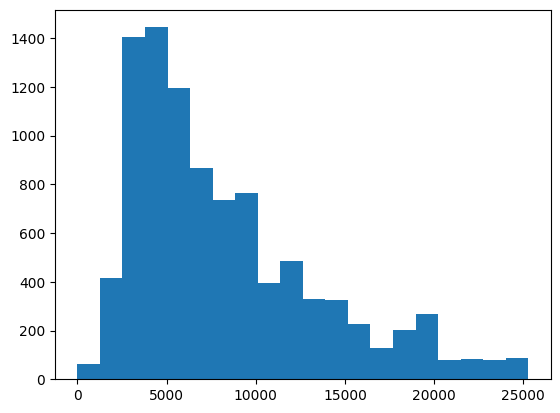

In [18]:
plt.hist(listing['price'], bins=20);

calendar

In [19]:
calendar["price"] = calendar["price"].str.replace("[$, ]", "").astype(float)
calendar["adjusted_price"] = calendar["adjusted_price"].str.replace("[$, ]", "").astype(float)

In [20]:
# The maximam seems outlier. Therefore, we'll drop outliers.
# One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.
# Computing IQR
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
calendar = calendar.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

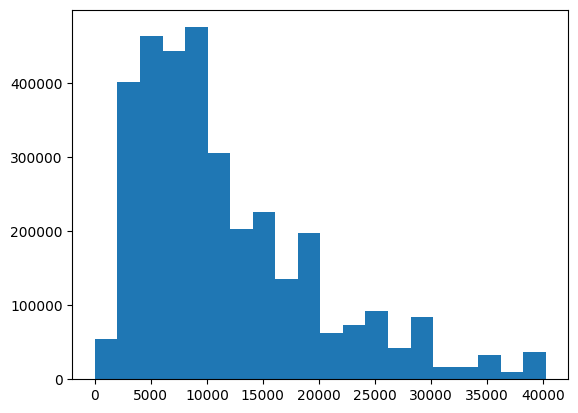

In [21]:
plt.hist(calendar['price'], bins=20);

## Explore Existing Data

### Categorical Columns

listing

In [22]:
# Mendapatkan kolom-kolom dengan tipe data kategorikal
categorical_columns = listing.select_dtypes(include=['object']).columns
categorical_columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable'],
      dtype='object')

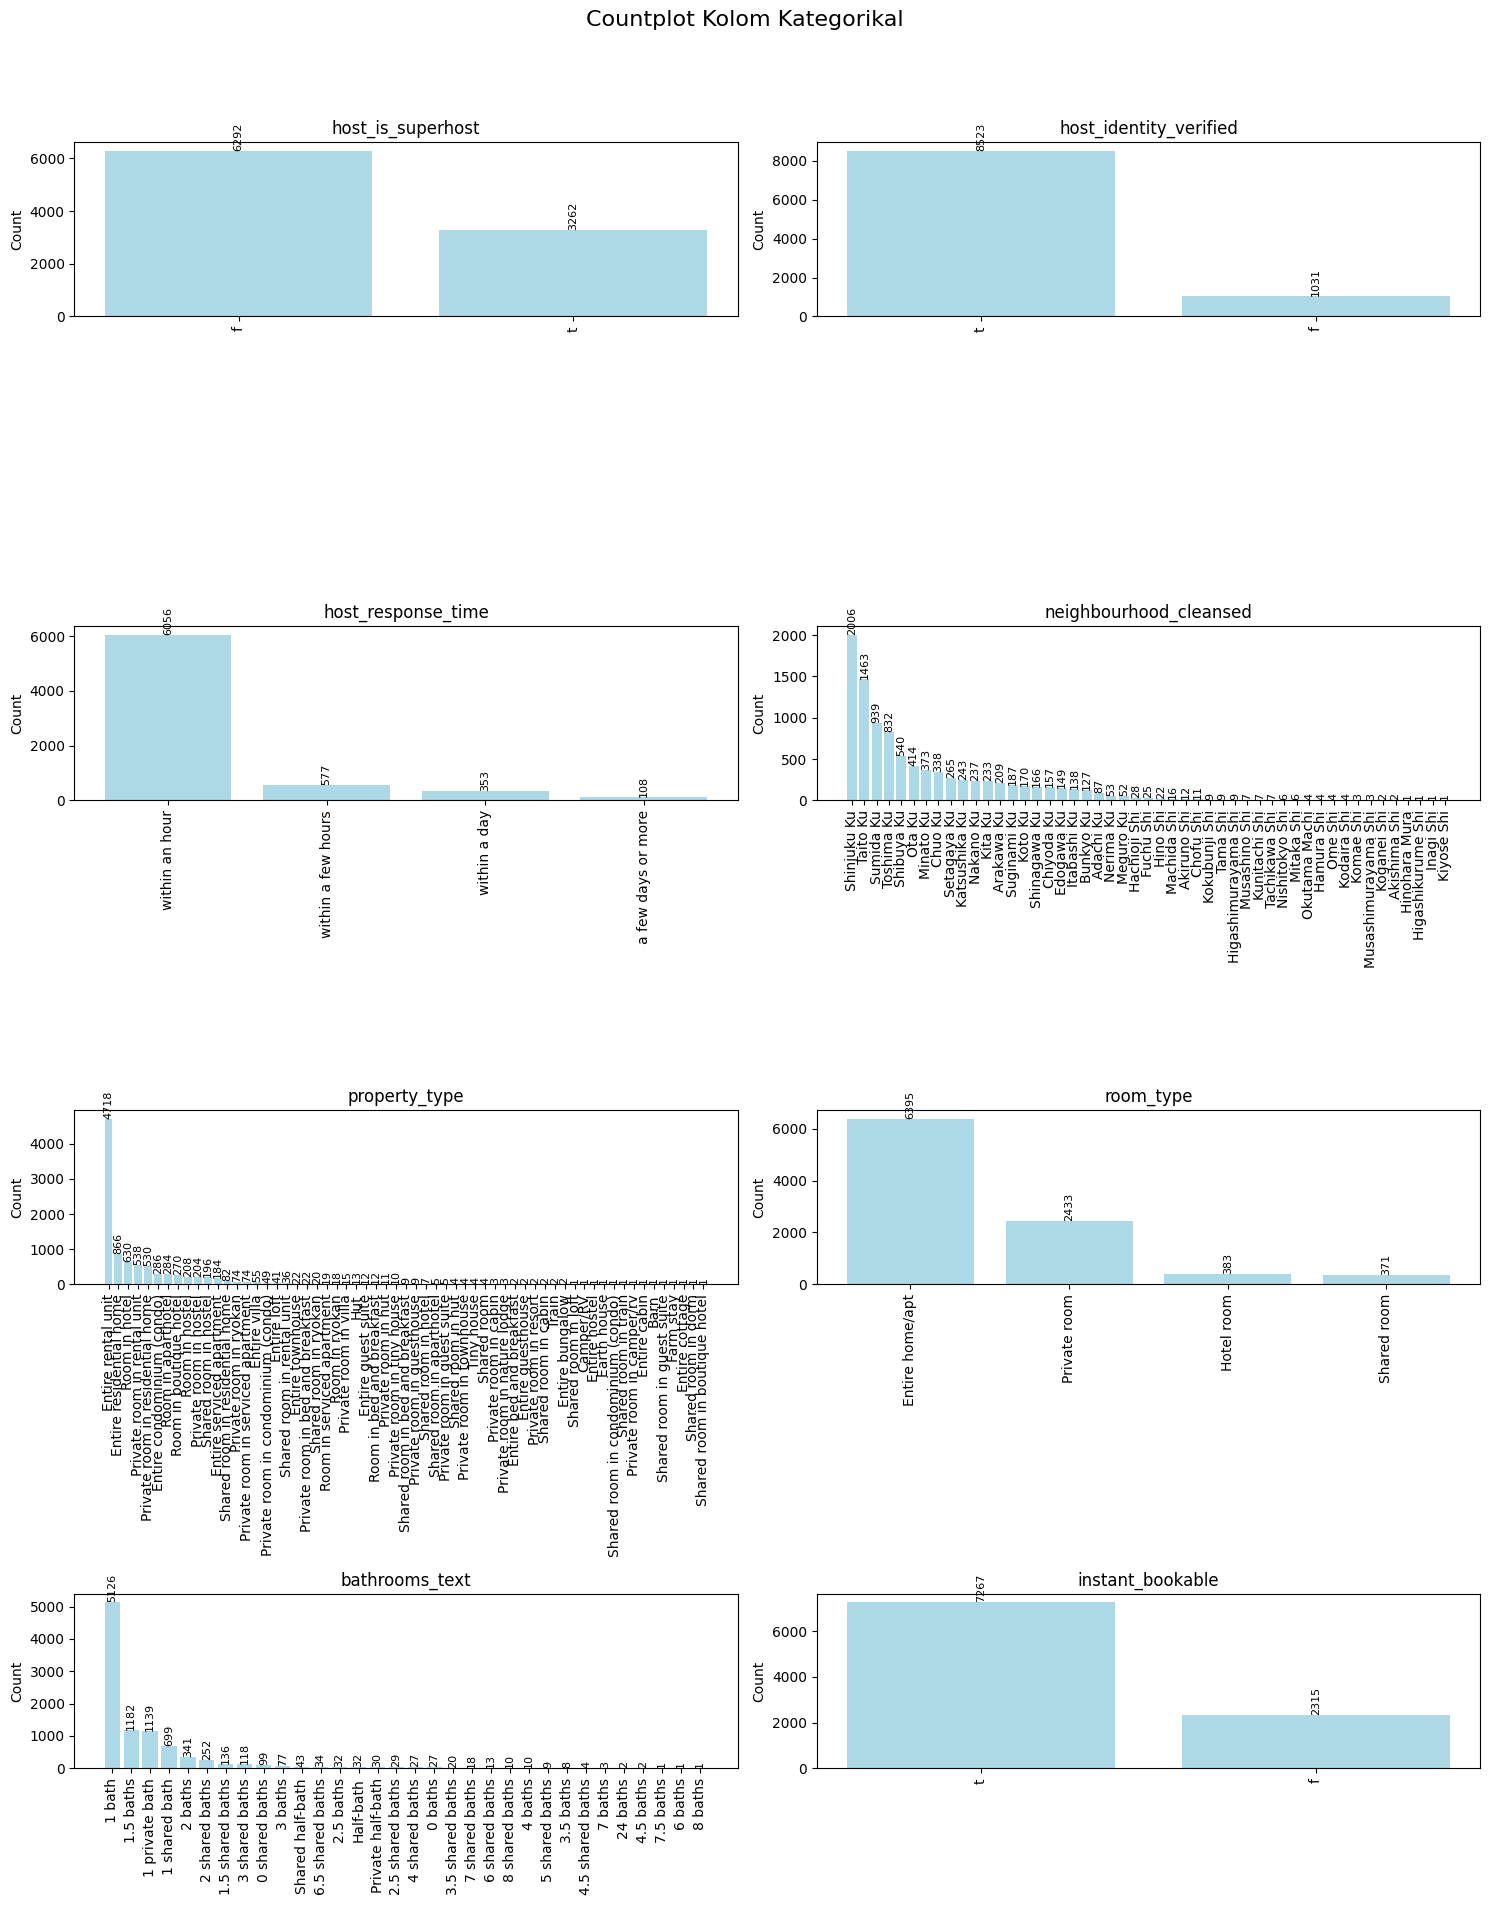

In [23]:
def plot_countplots(listing):
    categorical_columns = ['host_is_superhost','host_identity_verified', 'host_response_time',
                           'neighbourhood_cleansed', 'property_type', 'room_type',
                           'bathrooms_text', 'instant_bookable']

    num_cols = 2
    num_rows = (len(categorical_columns) + 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    fig.suptitle('Countplot Kolom Kategorikal', fontsize=16)

    for ax, column in zip(axs.flat, categorical_columns):
        counts = listing[column].value_counts().sort_values(ascending=False)
        ax.bar(counts.index, counts.values, color='lightblue', linewidth=0)  # Menghilangkan garis tepi
        ax.set_title(column)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

        for j, count in enumerate(counts):
            ax.text(j, count, str(count), ha='center', va='bottom', rotation=90, fontsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Menyimpan gambar dalam format JPG
    plt.savefig('countplots.jpg')

    plt.show()

# Contoh penggunaan fungsi
plot_countplots(listing)

calendar

In [24]:
# Explore the calendar.csv and find the way
print('The number of available in the calendar is {}'.format(calendar[calendar['available'] == 't']['available'].count()))
print('The number of not available in the calendar is {}'.format(calendar[calendar['available'] == 'f']['available'].count()))

The number of available in the calendar is 1352659
The number of not available in the calendar is 2022109


In [25]:
# The duration of calendar data
print('The duration is between {} and {}.'.format(calendar['date'].min(), calendar['date'].max()))

The duration is between 2021-10-28 and 2022-10-30.


In [26]:
calendar['date'] = pd.to_datetime(calendar['date'])
# Extract the year and month from the 'date' column
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month

# Drop the original 'date' column
calendar.drop(columns=['date'], inplace=True)

In [41]:
calendar.head()

listing_id available       price adjusted_price  minimum_nights  \
0     4606903         f  $20,000.00     $20,000.00             3.0   
1     4606903         f  $24,000.00     $24,000.00             3.0   
2     4606903         f  $24,000.00     $24,000.00             3.0   
3     4606903         t  $24,000.00     $24,000.00             3.0   
4     4606903         t  $24,000.00     $24,000.00             3.0   

   maximum_nights  year  month  
0            30.0  2021     10  
1            30.0  2021     10  
2            30.0  2021     10  
3            30.0  2021     11  
4            30.0  2021     11

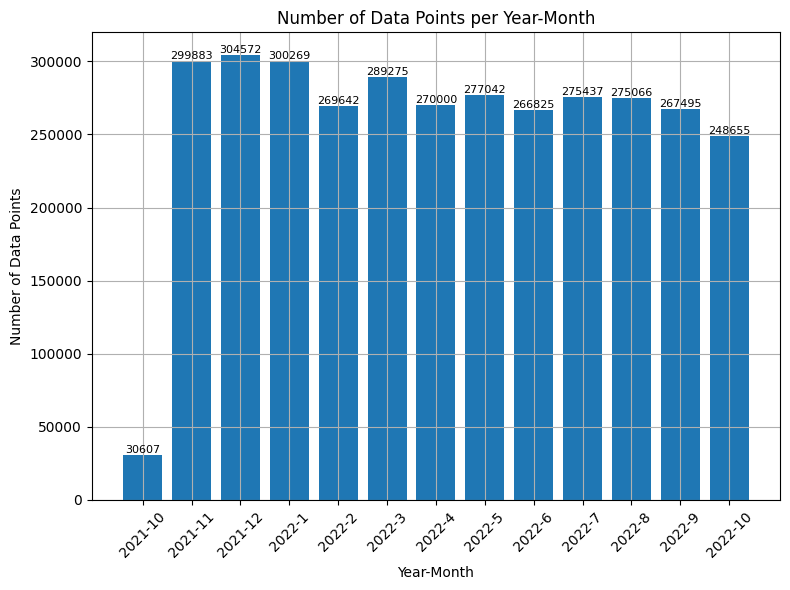

In [27]:
# Group the data by year and month and count the number of data points per month
data_per_month = calendar.groupby(['year', 'month']).size().reset_index(name='count')

# Plot the number of data points per year and month
plt.figure(figsize=(8, 6))
plt.bar(data_per_month['year'].astype(str) + '-' + data_per_month['month'].astype(str), data_per_month['count'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Year-Month')
plt.xticks(rotation=45)

# Annotate the bars with count values
for i, v in enumerate(data_per_month['count']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

### Numerical Columns

listing

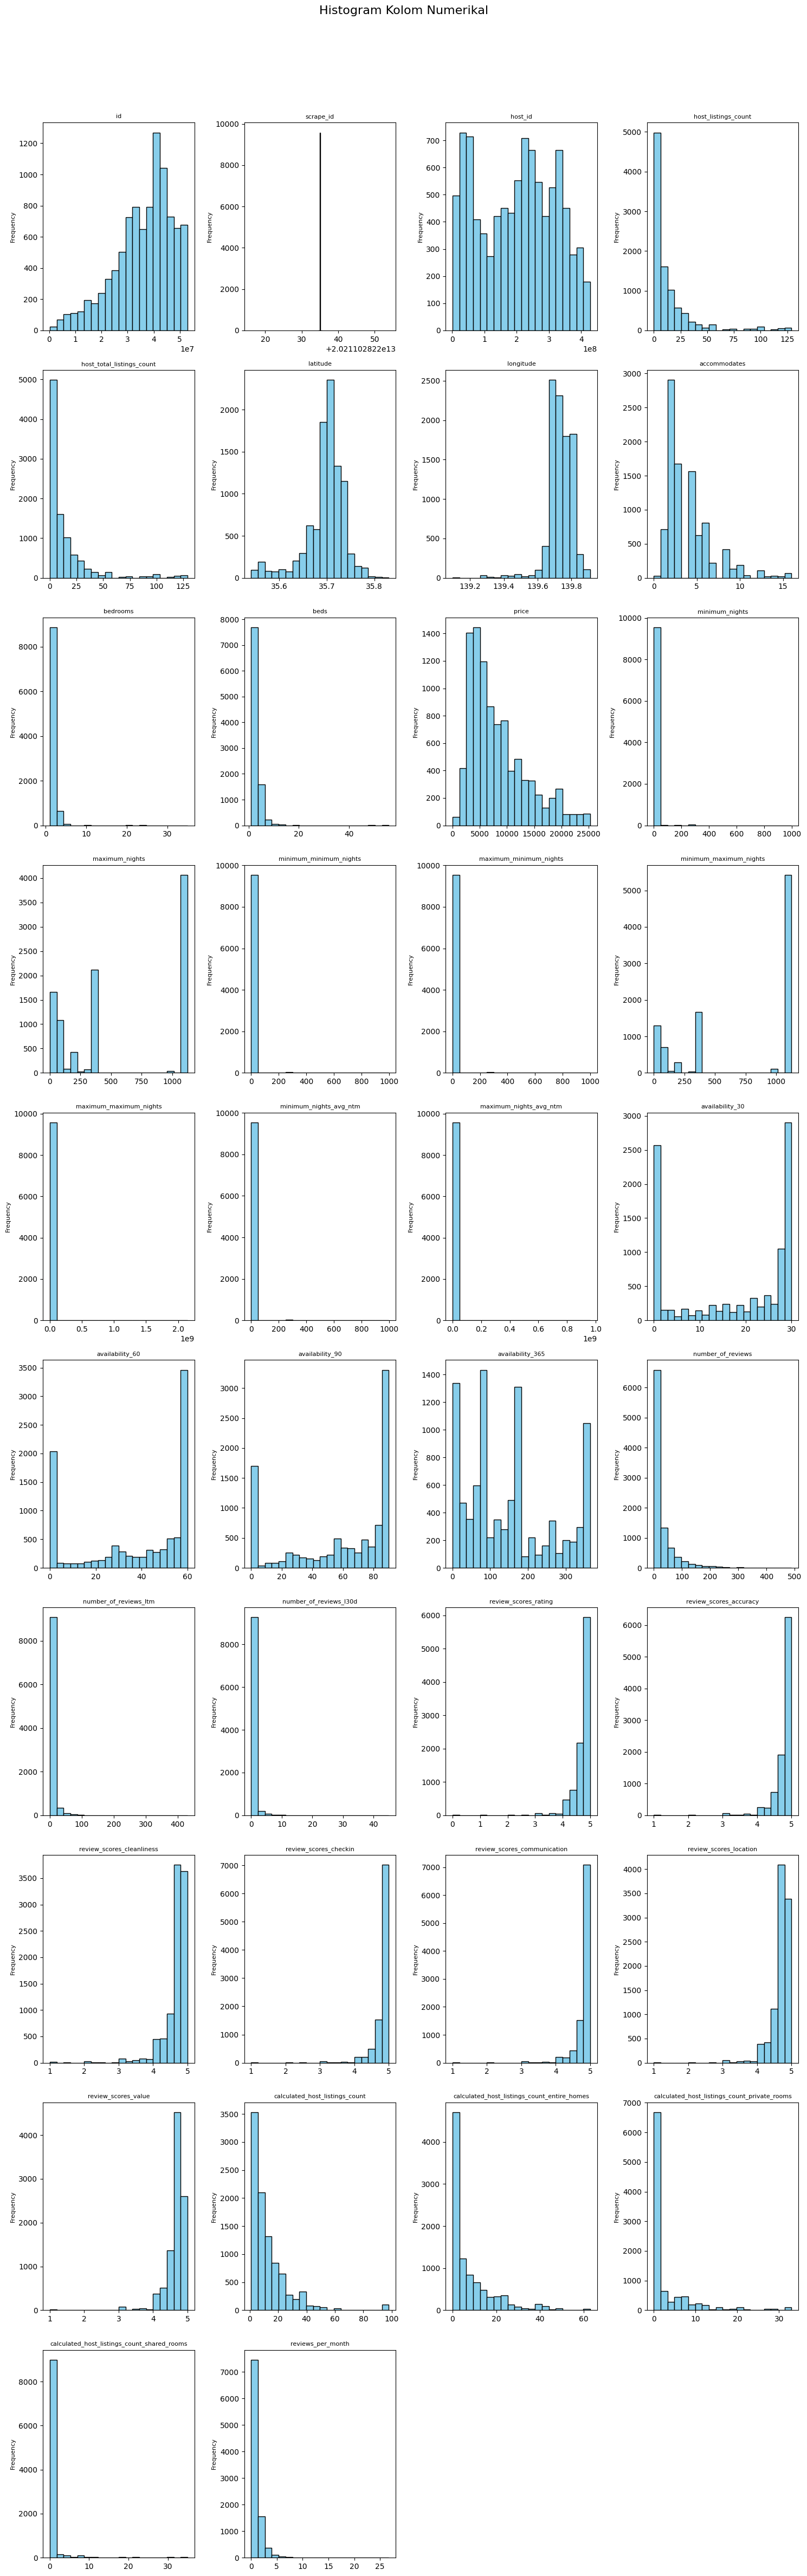

In [29]:
def plot_histograms(listing):
    # Mendapatkan kolom-kolom dengan tipe data numerikal
    numerical_columns = listing.select_dtypes(include=[np.number]).columns

    # Mengisi nilai NaN dengan median untuk setiap kolom numerikal
    df_filled = listing[numerical_columns].fillna(listing[numerical_columns].median())

    # Filter kolom numerikal yang tidak mengandung NaN
    numerical_columns_without_nan = df_filled.columns[~df_filled.isnull().any()]

    num_cols = 4
    num_rows = -(-len(numerical_columns_without_nan) // num_cols)  # Round up division

    # Jika tidak ada kolom numerikal tanpa NaN, keluar dari fungsi
    if not numerical_columns_without_nan.any():
        print("Tidak ada kolom numerikal tanpa NaN untuk ditampilkan.")
        return

    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', titlesize=8)
    plt.rc('axes', labelsize=8)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    fig.suptitle('Histogram Kolom Numerikal', fontsize=16)

    for ax, column in zip(axs.flat, numerical_columns_without_nan):
        ax.hist(df_filled[column], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(column)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')

    for i in range(len(numerical_columns_without_nan), num_rows*num_cols):
        fig.delaxes(axs.flat[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Menyimpan gambar dalam format JPG
    plt.savefig('histograms.jpg')

    plt.show()

# Contoh penggunaan fungsi
plot_histograms(listing)

In [30]:
# Histgram of number of beds
print('The maximum number of beds is {}'.format(listing.beds.max()))
print('The minimum number of beds is {}'.format(listing.beds.min()))
print('The maximum number of accomodates is {}'.format(listing.accommodates.max()))
print('The minimum number of accomodates is {}'.format(listing.accommodates.min()))
print(listing.beds.value_counts())

The maximum number of beds is 56.0
The minimum number of beds is 1.0
The maximum number of accomodates is 16
The minimum number of accomodates is 0
1.0     2942
2.0     2910
3.0     1143
4.0      959
5.0      351
6.0      270
7.0      100
8.0       83
10.0      47
9.0       42
12.0      20
11.0      12
13.0       3
50.0       2
56.0       2
20.0       2
36.0       1
30.0       1
16.0       1
14.0       1
18.0       1
Name: beds, dtype: int64


### Correlation

In [31]:
# Mendapatkan kolom-kolom dengan tipe data numerikal
numerical_columns = listing.select_dtypes(include=[np.number]).columns
# Membuat matriks korelasi
correlation_matrix = listing[numerical_columns].corr()
# Ubah matriks korelasi menjadi dataframe
correlation_df = pd.DataFrame(correlation_matrix, index=numerical_columns, columns=numerical_columns)
correlation_df

id  scrape_id   host_id  \
id                                            1.000000        NaN  0.569658   
scrape_id                                          NaN        NaN       NaN   
host_id                                       0.569658        NaN  1.000000   
host_listings_count                           0.056971        NaN -0.112892   
host_total_listings_count                     0.056971        NaN -0.112892   
neighbourhood_group_cleansed                       NaN        NaN       NaN   
latitude                                      0.004928        NaN  0.024465   
longitude                                     0.078784        NaN  0.103470   
accommodates                                 -0.003085        NaN -0.035936   
bathrooms                                          NaN        NaN       NaN   
bedrooms                                     -0.023875        NaN -0.065392   
beds                                         -0.037076        NaN -0.057904   
price                                        -0.028013        NaN  0.007061   
minimum_nights                                0.020485        NaN  0.034707   
maximum_nights                                0.026114        NaN -0.057861   
minimum_minimum_nights                        0.020894        NaN  0.032818   
maximum_minimum_nights                        0.020365        NaN  0.030390   
minimum_maximum_nights                        0.055346        NaN -0.038681   
maximum_maximum_nights                        0.015672        NaN  0.027491   
minimum_nights_avg_ntm                        0.022114        NaN  0.032300   
maximum_nights_avg_ntm                        0.015666        NaN  0.027484   
calendar_updated                                   NaN        NaN       NaN   
availability_30                              -0.014238        NaN  0.005479   
availability_60                               0.006709        NaN  0.018252   
availability_90                               0.004613        NaN  0.014536   
availability_365                             -0.054095        NaN -0.025065   
number_of_reviews                            -0.629796        NaN -0.358246   
number_of_reviews_ltm                         0.005567        NaN  0.009807   
number_of_reviews_l30d                        0.046800        NaN  0.028365   
review_scores_rating                         -0.050743        NaN -0.047273   
review_scores_accuracy                       -0.090944        NaN -0.059100   
review_scores_cleanliness                    -0.084734        NaN -0.038149   
review_scores_checkin                        -0.101477        NaN -0.111671   
review_scores_communication                  -0.112758        NaN -0.086398   
review_scores_location                       -0.021335        NaN -0.034601   
review_scores_value                          -0.035039        NaN -0.031934   
calculated_host_listings_count                0.119130        NaN  0.028040   
calculated_host_listings_count_entire_homes   0.159019        NaN -0.057315   
calculated_host_listings_count_private_rooms  0.064715        NaN  0.072867   
calculated_host_listings_count_shared_rooms  -0.036525        NaN  0.032880   
reviews_per_month                            -0.120775        NaN -0.052122   

                                              host_listings_count  \
id                                                       0.056971   
scrape_id                                                     NaN   
host_id                                                 -0.112892   
host_listings_count                                      1.000000   
host_total_listings_count                                1.000000   
neighbourhood_group_cleansed                                  NaN   
latitude                                                -0.006797   
longitude                                                0.064048   
accommodates                                            -0.140202   
bathrooms                                  

### Bivariate

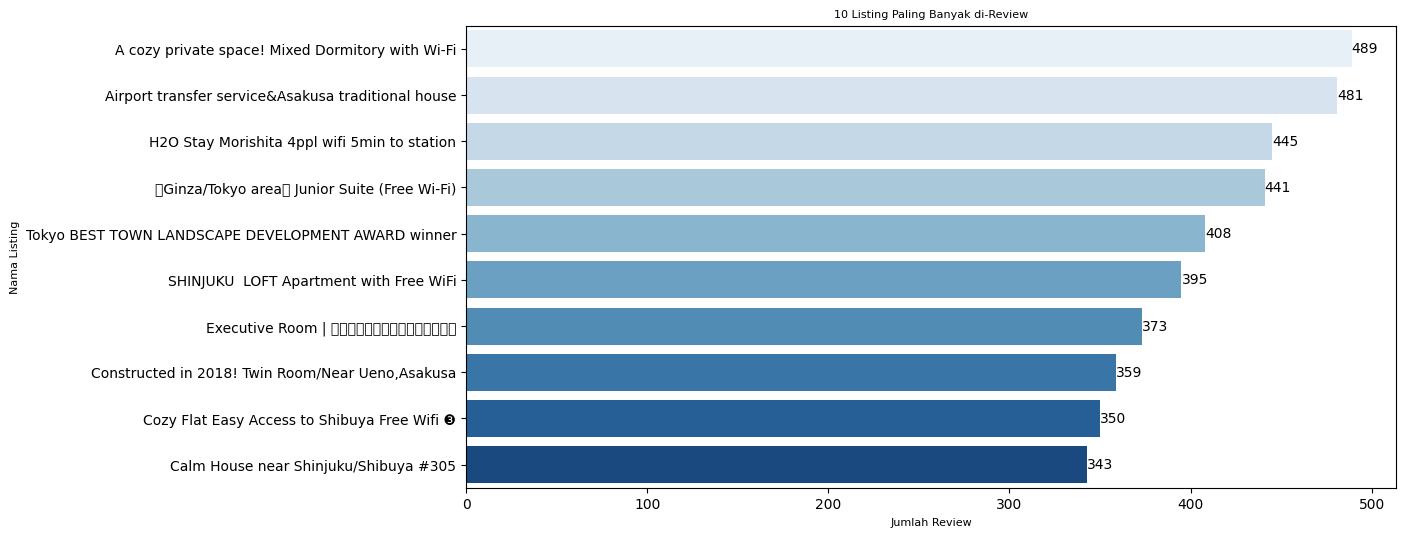

In [32]:
# Mengurutkan data berdasarkan jumlah review secara descending
most_reviewed_listings = listing.sort_values(by='number_of_reviews', ascending=False)

# Mengambil 10 listing paling banyak di-review
top_10_reviewed = most_reviewed_listings.head(10)

# Membuat bar plot untuk memvisualisasikan jumlah review dari 10 listing teratas
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_reviews', y='name', data=top_10_reviewed, palette='Blues')
plt.xlabel('Jumlah Review')
plt.ylabel('Nama Listing')
plt.title('10 Listing Paling Banyak di-Review')

# Menambahkan label pada setiap bar
for index, value in enumerate(top_10_reviewed['number_of_reviews']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

In [33]:
# Membuat peta dengan lokasi awal di Tokyo
map_airbnb = folium.Map(location=[35.682839, 139.759455], zoom_start=10.5)

# Menyusun data spasial dari kolom 'latitude' dan 'longitude'
heat_data = [[row['latitude'], row['longitude']] for index, row in listing.iterrows()]

# Membuat heatmap berdasarkan data spasial dengan skema warna biru
HeatMap(heat_data, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1: 'red'}).add_to(map_airbnb)

# Menampilkan peta
map_airbnb

In [34]:
# Membuat peta dengan lokasi awal di Tokyo
map_airbnb = folium.Map(location=[35.682839, 139.759455], zoom_start=10.5)

# Menambahkan CircleMarker untuk setiap data pada DataFrame
for index, row in listing.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    folium.CircleMarker(location=[latitude, longitude], radius=5, color='lightblue', fill=True, fill_color='blue').add_to(map_airbnb)

# Menampilkan peta
map_airbnb

## Verify Data Quality

In [28]:
listing = listing.rename(index=str, columns={"id": "listing_id"})

In [29]:
# We'll merge the listing dataframe and 'month' in calendar dataframe
# Create a column that holds month data in calendar dataframe
calendar_new = calendar.drop(['available','adjusted_price','price'], axis=1)
listing_new = listing.drop(['minimum_nights','maximum_nights'], axis=1)

# Merge calendar and listing data onmerge
df_new = pd.merge(calendar_new, listing_new, on = 'listing_id')

### Handling Missing Values

In [30]:
threshold50 = 0.5
print("COLUNS WITH MORE 50% NAN\n\n",set(df_new.columns[df_new.isna().mean()> threshold50])) # kolom dengan lebih dari 50% nan
print("\nCOLUMNS WITH LESS THAN 50% NAN AND MORE THAN 0% NAN:\n\n", set(df_new.columns[(df_new.isna().mean() < threshold50) & (df_new.isna().mean() > 0)]))

COLUNS WITH MORE 50% NAN

 {'calendar_updated', 'neighbourhood_group_cleansed', 'bathrooms'}

COLUMNS WITH LESS THAN 50% NAN AND MORE THAN 0% NAN:

 {'host_is_superhost', 'host_about', 'bedrooms', 'host_name', 'host_picture_url', 'host_has_profile_pic', 'review_scores_value', 'license', 'host_total_listings_count', 'neighborhood_overview', 'host_response_time', 'host_location', 'beds', 'host_listings_count', 'host_response_rate', 'bathrooms_text', 'description', 'review_scores_checkin', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'last_review', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_communication', 'neighbourhood', 'reviews_per_month', 'host_neighbourhood', 'host_acceptance_rate', 'review_scores_accuracy', 'first_review', 'host_since', 'host_identity_verified', 'host_thumbnail_url'}


####Dropna

> 50%

In [31]:
df_new.dropna(thresh=len(df_new) * threshold50, axis=1, inplace=True)

In [32]:
set(df_new.columns[df_new.isna().mean()> threshold50]) # kolom dengan lebih dari 50% nan

set()

In [33]:
# 1 dropping all the rows that have missing data
df_new.dropna(inplace=True)

#### Fillna Numerical Columns

In [58]:
set(df_new.columns[(df_new.isna().mean() < threshold50) & (df_new.isna().mean() > 0)])

{'bathrooms_text',
 'bedrooms',
 'beds',
 'description',
 'first_review',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'last_review',
 'license',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'neighborhood_overview',
 'neighbourhood',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month'}

In [89]:
def handle_outliers_and_fillna(df):
    # Fungsi untuk mengisi NaN values menggunakan median jika terdapat outliers, jika tidak, gunakan mean
    def fillna_with_median_or_mean(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = column[(column < lower_bound) | (column > upper_bound)]
        if len(outliers) > 0:
            median_value = column.median()
            column.fillna(median_value, inplace=True)
        else:
            mean_value = column.mean()
            column.fillna(mean_value, inplace=True)
        return column

    # Loop untuk mengolah setiap kolom numerical pada DataFrame
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for column in numerical_columns:
        df[column] = fillna_with_median_or_mean(df[column])

    return df

# Contoh penggunaan fungsi dengan DataFrame df
df = handle_outliers_and_fillna(df)

#### Fillna Categorical Columns

In [35]:
df.drop(['description', 'neighborhood_overview', 'host_about', 'host_response_time', 'host_neighbourhood'], axis=1, inplace=True)

In [91]:
# Drop baris untuk kolom 'first_review' dan 'last_review'
df.dropna(subset=['first_review', 'last_review'], inplace=True)

In [92]:
def handle_categorical_missing_values(df):
    # Loop untuk mengisi missing values pada kolom kategorikal dengan nilai modus
    for column in df.select_dtypes(include='object').columns:
        mode_value = df[column].mode().iloc[0]
        df[column].fillna(mode_value, inplace=True)
    return df

# Contoh penggunaan fungsi dengan DataFrame df
df = handle_categorical_missing_values(df)

## Handling Duplicated Values

In [36]:
# Mendrop nilai duplikat dari DataFrame
df_new.drop_duplicates(inplace=True)

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27912 entries, 1095 to 3215438
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    27912 non-null  int64  
 1   minimum_nights                                27912 non-null  float64
 2   maximum_nights                                27912 non-null  float64
 3   year                                          27912 non-null  int64  
 4   month                                         27912 non-null  int64  
 5   listing_url                                   27912 non-null  object 
 6   scrape_id                                     27912 non-null  int64  
 7   last_scraped                                  27912 non-null  object 
 8   name                                          27912 non-null  object 
 9   description                                   27912 non-

In [38]:
# Change 'object' datatype to numeric -> host_response_rate, security_deposit, cleaning_fee, extra_people
df_new["host_response_rate"] = df_new["host_response_rate"].str.replace("%", "").astype(float)
df_new["host_acceptance_rate"] = df_new["host_acceptance_rate"].str.replace("%", "").astype(float)

## Save Dataset

In [39]:
df_new.to_csv('/content/drive/MyDrive/Portofolio 2023/Machine Learning Project - Tokyo Airbnb Price Prediction/cleaned.csv',index=False)

In [40]:
df_new.head(1)

listing_id  minimum_nights  maximum_nights  year  month  \
1095     4616579             3.0          1125.0  2021     10   

                               listing_url       scrape_id last_scraped  \
1095  https://www.airbnb.com/rooms/4616579  20211028222535   2021-10-29   

                           name  \
1095  Furnished Private Apt.213   

                                            description  \
1095  It takes 5 min walk to Fujimidai Sta.. You can...   

                                  neighborhood_overview  \
1095  5 min walk to Fujimidai Sta. on Seibu Ikebukur...   

                                            picture_url   host_id  \
1095  https://a0.muscache.com/pictures/5ab7c7be-8b92...  17736560   

                                        host_url      host_name  host_since  \
1095  https://www.airbnb.com/users/show/17736560  ﾀﾂﾛｳ (Taturo)  2014-07-06   

             host_location                                         host_about  \
1095  Nakano, Tokyo, Japan  I am a retired person who wants to make mutual...   

     host_response_time  host_response_rate  host_acceptance_rate  \
1095     within an hour               100.0                 100.0   

     host_is_superhost                                 host_thumbnail_url  \
1095                 t  https://a0.muscache.com/im/users/17736560/prof...   

                                       host_picture_url host_neighbourhood  \
1095  https://a0.muscache.com/im/users/17736560/prof...    Nakano District   

      host_listings_count  host_total_listings_count  \
1095                 10.0                       10.0   

                 host_verifications host_has_profile_pic  \
1095  ['email', 'phone', 'reviews']                    t   

     host_identity_verified               neighbourhood  \
1095                      t  Nakano-ku, Tōkyō-to, Japan   

     neighbourhood_cleansed  latitude  longitude       property_type  \
1095              Nakano Ku  35.73414  139.63305  Entire rental unit   

            room_type  accommodates bathrooms_text  bedrooms  beds  \
1095  Entire home/apt             2         1 bath       1.0   1.0   

                                              amenities   price  \
1095  ["Air conditioning", "Shampoo", "Carbon monoxi...  4770.0   

      minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
1095                     3.0                     3.0                  1125.0   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
1095                  1125.0                     3.0                  1125.0   

     has_availability  availability_30  availability_60  availability_90  \
1095                t               30               60               90   

      availability_365 calendar_last_scraped  number_of_reviews  \
1095                90            2021-10-29                 73   

      number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
1095                      0                       0   2015-04-07  2020-01-15   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1095                  4.82                    4.85                       4.85   

      review_scores_checkin  review_scores_communication  \
1095                   4.95                         4.92   

      review_scores_location  review_scores_value  \
1095                    4.78                 4.82   

                                                license instant_bookable  \
1095  Hotels and Inns Business Act | 東京都中野区保健所 | 30中...                t   

      calculated_host_listings_count  \
1095                               9   

      calculated_host_listings_count_entire_homes  \
1095                                            9   

      calculated_host_listings_count_private_rooms  \
1095                                             0   

      calculated_host_listings_count_shared_rooms  reviews_per_month  
1095                                          

<Axes: >

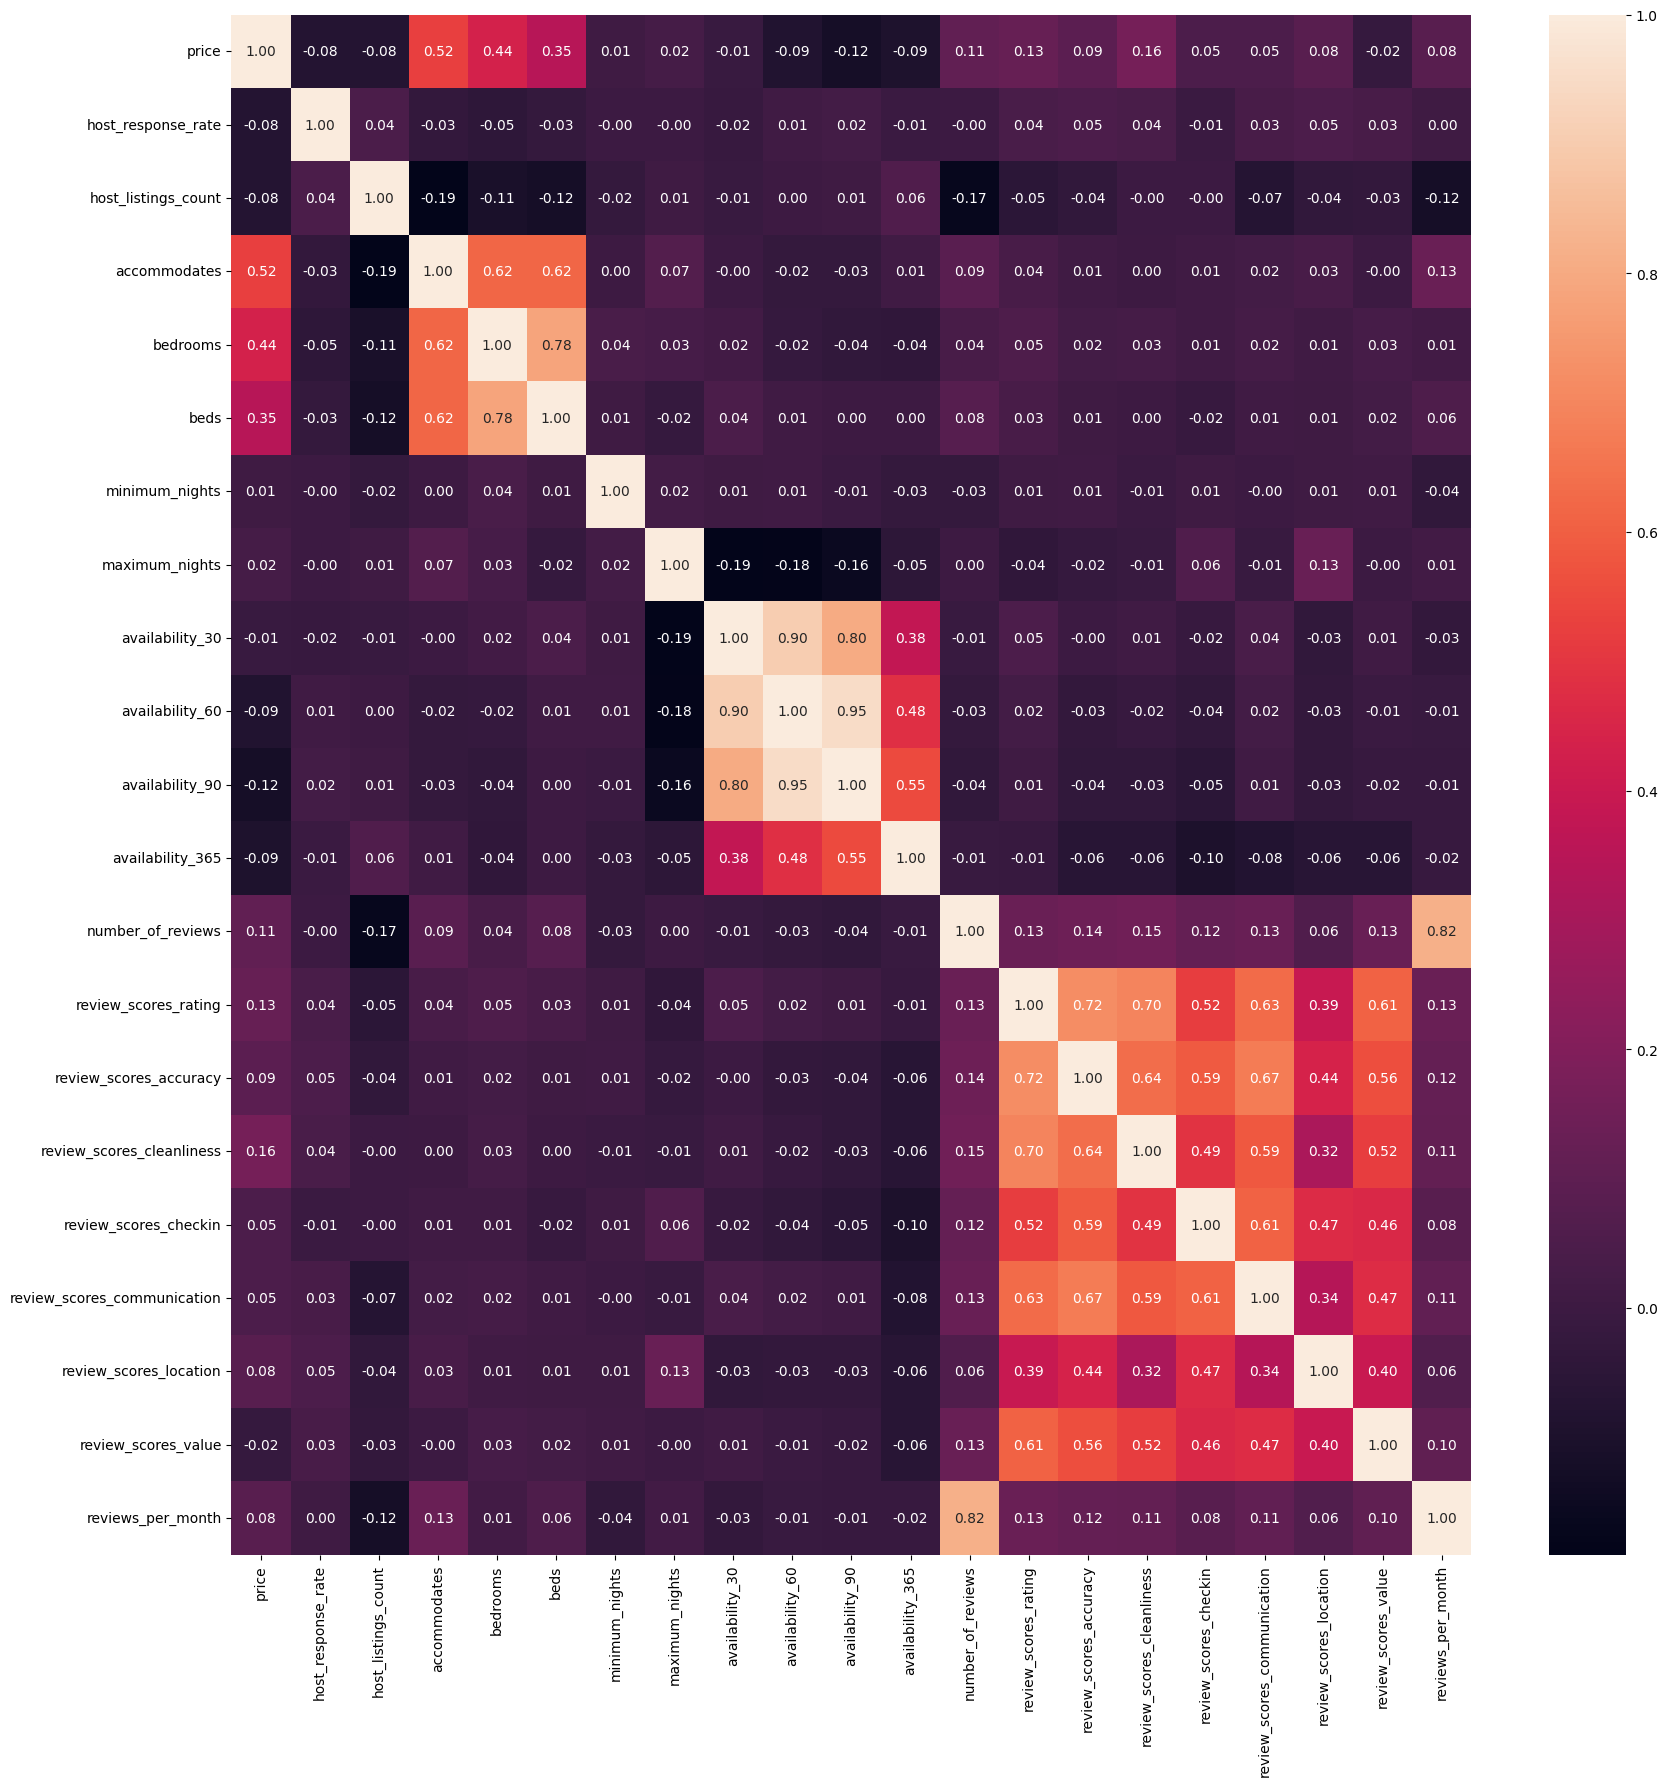

In [41]:
# numerical variables to find out the correlations
cols = ['price', 'host_response_rate','host_listings_count','accommodates',
        'bedrooms', 'beds','minimum_nights','maximum_nights','availability_30', 'availability_60',
        'availability_90','availability_365','number_of_reviews','review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'reviews_per_month']
plt.figure(figsize=(20,20))
sns.heatmap(df_new[cols].corr(), annot=True, fmt='.2f')

In [42]:
#Pull a list of the column names of the categorical variables
cat_df = df_new.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
cat_cols_lst

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'license', 'instant_bookable'],
      dtype='object')

In [43]:
cols = ['price', 'host_response_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates',
        'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
        'review_scores_location', 'review_scores_value', 'reviews_per_month',
        'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text','instant_bookable']

# Create a new DataFrame containing only the specified columns
new_df = df_new[cols].copy()

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27912 entries, 1095 to 3215438
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        27912 non-null  float64
 1   host_response_rate           27912 non-null  float64
 2   host_listings_count          27912 non-null  float64
 3   host_total_listings_count    27912 non-null  float64
 4   accommodates                 27912 non-null  int64  
 5   bedrooms                     27912 non-null  float64
 6   beds                         27912 non-null  float64
 7   minimum_nights               27912 non-null  float64
 8   maximum_nights               27912 non-null  float64
 9   availability_30              27912 non-null  int64  
 10  availability_60              27912 non-null  int64  
 11  availability_90              27912 non-null  int64  
 12  availability_365             27912 non-null  int64  
 13  number_of_r

In [46]:
# Assuming your DataFrame is named df

# Identify object-type columns
object_cols = new_df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over object-type columns and encode them
for col in object_cols:
    new_df[col] = label_encoder.fit_transform(new_df[col].astype(str))

In [47]:
# Train ML model by only numerical columns, by LinearRegression
X = new_df.drop('price', axis=1)
y = new_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=30)

In [63]:
X

host_response_rate  host_listings_count  host_total_listings_count  \
1095                  100.0                 10.0                       10.0   
1098                  100.0                 10.0                       10.0   
1128                  100.0                 10.0                       10.0   
1159                  100.0                 10.0                       10.0   
1190                  100.0                 10.0                       10.0   
...                     ...                  ...                        ...   
3215316               100.0                119.0                      119.0   
3215346               100.0                119.0                      119.0   
3215377               100.0                119.0                      119.0   
3215408               100.0                119.0                      119.0   
3215438               100.0                119.0                      119.0   

         accommodates  bedrooms  beds  minimum_nights  maximum_nights  \
1095                2       1.0   1.0             3.0          1125.0   
1098                2       1.0   1.0             3.0          1125.0   
1128                2       1.0   1.0             3.0          1125.0   
1159                2       1.0   1.0             3.0          1125.0   
1190                2       1.0   1.0             3.0          1125.0   
...               ...       ...   ...             ...             ...   
3215316             2       1.0   1.0             2.0          1125.0   
3215346             2       1.0   1.0             2.0          1125.0   
3215377             2       1.0   1.0             2.0          1125.0   
3215408             2       1.0   1.0             2.0          1125.0   
3215438             2       1.0   1.0             2.0          1125.0   

         availability_30  availability_60  availability_90  availability_365  \
1095                  30               60               90                90   
1098                  30               60               90                90   
1128                  30               60               90                90   
1159                  30               60               90                90   
1190                  30               60               90                90   
...                  ...              ...              ...               ...   
3215316                1               31               61               151   
3215346                1               31               61               151   
3215377                1               31               61               151   
3215408                1               31               61               151   
3215438                1               31               61               151   

         number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
1095                    73                      0                  4.82   
1098                    73                      0                  4.82   
1128                    73                      0                  4.82   
1159                    73                      0                  4.82   
1190                    73                      0                  4.82   
...                    ...                    ...                   ...   
3215316                  2                      1                  4.50   
3215346                  2                      1                  4.50   
3215377                  2                      1                  4.50   
3215408                  2                      1                  4.50   
3215438                  2                      1                  4.50   

         review_scores_accuracy  review_scores_cleanliness  \
1095                       4.85                       4.85   
1098                       4.85                       4.85   
1128                       4.85                       4.85   
1159                       4.85                       4.85   
1190       

In [64]:
y

price
1095     4770.0
1098     4770.0
1128     4770.0
1159     4770.0
1190     4770.0
...         ...
3215316  7863.0
3215346  7863.0
3215377  7863.0
3215408  7863.0
3215438  7863.0

[27912 rows x 1 columns]

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19538 entries, 15404 to 451690
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           19538 non-null  float64
 1   host_listings_count          19538 non-null  float64
 2   host_total_listings_count    19538 non-null  float64
 3   accommodates                 19538 non-null  int64  
 4   bedrooms                     19538 non-null  float64
 5   beds                         19538 non-null  float64
 6   minimum_nights               19538 non-null  float64
 7   maximum_nights               19538 non-null  float64
 8   availability_30              19538 non-null  int64  
 9   availability_60              19538 non-null  int64  
 10  availability_90              19538 non-null  int64  
 11  availability_365             19538 non-null  int64  
 12  number_of_reviews            19538 non-null  int64  
 13  number_of_r

In [49]:
y_train.dtypes

price    float64
dtype: object

In [51]:
# Initialize and train the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

results = []
feature_importance = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    results.append([name, mse_train, mse_test, r2_train, r2_test])

    # Extract feature importance for models that support it
    if name in ['Random Forest', 'XGBoost']:
        importance = model.feature_importances_
        feature_importance.append(pd.Series(importance, index=X.columns))
    else:
        feature_importance.append(pd.Series([0]*len(X.columns), index=X.columns))

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Model', 'MSE Train', 'MSE Test', 'R^2 Train', 'R^2 Test'])

# Create a DataFrame for feature importance
importance_df = pd.concat(feature_importance, axis=1)
importance_df.columns = models.keys()

In [52]:
print("Results:")
results_df

Results:


Model     MSE Train      MSE Test  R^2 Train  R^2 Test
0  Linear Regression  1.850886e+07  1.811550e+07   0.395847  0.411155
1      Random Forest  5.623683e+03  3.936338e+04   0.999816  0.998720
2            XGBoost  1.204195e+05  1.800360e+05   0.996069  0.994148
3                SVR  3.480605e+07  3.510720e+07  -0.136114 -0.141162

In [53]:
print("\nFeature Importance:")
importance_df


Feature Importance:


Linear Regression  Random Forest   XGBoost  SVR
host_response_rate                           0       0.010468  0.017833    0
host_listings_count                          0       0.025156  0.011995    0
host_total_listings_count                    0       0.026132  0.000000    0
accommodates                                 0       0.047338  0.043774    0
bedrooms                                     0       0.290446  0.385787    0
beds                                         0       0.023576  0.023227    0
minimum_nights                               0       0.024692  0.022183    0
maximum_nights                               0       0.018847  0.014322    0
availability_30                              0       0.019539  0.011235    0
availability_60                              0       0.016795  0.014493    0
availability_90                              0       0.017611  0.015859    0
availability_365                             0       0.052339  0.020873    0
number_of_reviews                            0       0.025010  0.011430    0
number_of_reviews_ltm                        0       0.047277  0.033046    0
review_scores_rating                         0       0.035014  0.010881    0
review_scores_accuracy                       0       0.021529  0.015422    0
review_scores_cleanliness                    0       0.036897  0.019850    0
review_scores_checkin                        0       0.020875  0.012778    0
review_scores_communication                  0       0.016675  0.007344    0
review_scores_location                       0       0.019573  0.011210    0
review_scores_value                          0       0.029897  0.018182    0
reviews_per_month                            0       0.036284  0.017775    0
neighbourhood_cleansed                       0       0.044993  0.043606    0
property_type                                0       0.028803  0.034114    0
room_type                                    0       0.009673  0.070648    0
bathrooms_text                               0       0.040852  0.055275    0
instant_bookable                             0       0.013706  0.056858    0

# Space Recommendation

In [84]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import re
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
rec = pd.read_csv('/content/drive/MyDrive/Portofolio 2023/Machine Learning Project - Tokyo Airbnb Price Prediction/cleaned.csv', usecols = ['listing_id','neighbourhood_cleansed', 'name', 'description','review_scores_rating'])

In [66]:
# Mendrop nilai duplikat dari DataFrame
rec.drop_duplicates(inplace=True)

In [72]:
rec.head(1)

listing_id                       name  \
0     4616579  Furnished Private Apt.213   

                                         description neighbourhood_cleansed  \
0  It takes 5 min walk to Fujimidai Sta.. You can...              Nakano Ku   

   review_scores_rating  
0                  4.82

In [68]:
rec['neighbourhood_cleansed'].value_counts().head(5)

Shinjuku Ku    396
Taito Ku       324
Sumida Ku      231
Toshima Ku     227
Shibuya Ku     133
Name: neighbourhood_cleansed, dtype: int64

In [73]:
def print_description(index):
    example = rec.iloc[index]
    if not example.empty:
        print("Listing ID:", example['listing_id'])
        print('Name:', example['name'])
        print('Description:\n', example['description'])
        print('Rating:', example['review_scores_rating'])

print_description(0)

Listing ID: 4616579
Name: Furnished Private Apt.213
Description:
 It takes 5 min walk to Fujimidai Sta.. You can get on SeibIkebukuro Line, Subway Yuurakucho Line and Subway Fukutoshin Line. Ikebukuro 15 min, Ginza, Shinjuku and Shibuya within 30 min without having to transfer.<br /><br /><b>The space</b><br />Full furnished,the room is prepared for you to move in anytime, so you can start your life in Tokyo today. <br />This has been a monthly apartment, but I have decided that I will provide here for a short term stay.<br />Because for safety. all electric apartment(no gas)<br />It is steel reinforced concrete construction,but, in the room, the natural wood is used for a ceiling, a floor and the wall, so that you can feel  the relaxing atmosphere.<br />It is very quiet.<br />When 2 guests stay, I will provide an extra futon-set.<br />There is no curfew. But please keep check- in time and check-out time.　<br /><br /><b>Guest access</b><br />There are two shared washing machines in the

In [86]:
rec['content'] = rec[['name','neighbourhood_cleansed','review_scores_rating']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [87]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(rec['content'])

In [88]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [98]:
# Combine relevant columns into a single 'content' column
rec['content'] = rec[['name', 'description', 'neighbourhood_cleansed']].astype(str).apply(lambda x: ' // '.join(x), axis=1)

# Create a new DataFrame without the current listing
rec_similar = rec.drop(index=0).reset_index(drop=True)

# Create a CountVectorizer
count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')
count_matrix = count_vectorizer.fit_transform(rec_similar['content'])

# Calculate cosine similarities
cosine_similarities = cosine_similarity(count_matrix, count_matrix)

# Function to recommend listings
def recommend(kota, num):
    idx = rec[rec['listing_id'] == kota].index[0]  # Use original rec DataFrame
    similar_indices = cosine_similarities[idx].argsort()[::-1][:num]
    recommendations = []
    for i, rec_idx in enumerate(similar_indices, start=1):
        listing_id = rec_similar.loc[rec_idx, 'listing_id']
        name = rec_similar.loc[rec_idx, 'name']
        similarity = cosine_similarities[idx][rec_idx]  # Added similarity value
        recommendations.append((listing_id, name, similarity))
    return recommendations

# User input for ID and Jumlah
ID = int(input("Masukkan ID: "))
JUMLAH = int(input("Masukkan Jumlah Pencarian: "))
recommendations = recommend(kota=ID, num=JUMLAH)
print("Recommendations:")
for i, (listing_id, name, similarity) in enumerate(recommendations, start=1):
    print(f"{i}. Listing ID: {listing_id}, Name: {name}, Similarity: {similarity:.4f}")

Masukkan ID: 4616579
Masukkan Jumlah Pencarian: 5
Recommendations:
1. Listing ID: 6859825, Name: Room103 Ikebukuro is 5 min by train, Similarity: 1.0000
2. Listing ID: 6166571, Name: Room204 Ikebukuro is 5 min by train, Similarity: 0.9691
3. Listing ID: 6164909, Name: Room203 Ikebukuro is 5 min by train, Similarity: 0.9580
4. Listing ID: 6613961, Name: Room205 Ikebukuro is 5 min by train, Similarity: 0.9567
5. Listing ID: 6214018, Name: Room202 Ikebukuro is 5 min by train, Similarity: 0.9508
